In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

# Bug Fix Benchmark Analysis

In [30]:
# Replace with the location of your result files.
DECOMPOSITION_PERFORMANCE_PATH='data/decomposition_scores.csv'
METRICS_PATH='data/metrics.csv'

## Performance

In [31]:
df_performance = pd.read_csv(DECOMPOSITION_PERFORMANCE_PATH, names=['project', 'bug_id', 'smartcommit_rand_index','flexeme_rand_index','file_rand_index'])
df_performance.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index
0,Cli,10,1.000000,0.000000,1.000000
1,Cli,11,1.000000,1.000000,1.000000
2,Cli,12,0.481884,0.710145,0.655797
3,Cli,13,1.000000,0.466667,0.780952
4,Cli,14,0.355556,0.355556,0.355556


In [32]:
df_performance.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index
count,809.000000,809.000000,809.000000,809.000000
mean,47.196539,0.771999,0.580455,0.775063
std,41.077802,0.253322,0.296075,0.253603
min,1.000000,0.000000,0.000000,0.000000
25%,15.000000,0.523810,0.400000,0.523810
50%,34.000000,0.892686,0.523810,0.933333
75%,71.000000,1.000000,0.846154,1.000000
max,176.000000,1.000000,1.000000,1.000000


In [33]:
df_performance.groupby(['project']).agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median', 'file_rand_index':'median'})

,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index
project,,,,
Cli,39,1.000000,0.500000,0.926899
Closure,174,0.743893,0.540515,0.786366
Codec,18,1.000000,0.655556,1.000000
Collections,4,1.000000,1.000000,1.000000
Compress,47,1.000000,0.586207,1.000000
Csv,16,1.000000,0.451128,1.000000
Gson,18,0.872294,0.523810,0.665224
JacksonCore,26,0.916667,0.491340,1.000000
JacksonDatabind,112,0.849231,0.553898,0.813418


In [34]:
df_performance.agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median', 'file_rand_index':'median'})

bug_id                    809.000000
smartcommit_rand_index      0.892686
flexeme_rand_index          0.523810
file_rand_index             0.933333
dtype: float64

In [35]:
df_perf_melted = pd.melt(df_performance, id_vars=['project', 'bug_id'])
df_perf_melted.head()

,project,bug_id,variable,value
0,Cli,10,smartcommit_rand_index,1.000000
1,Cli,11,smartcommit_rand_index,1.000000
2,Cli,12,smartcommit_rand_index,0.481884
3,Cli,13,smartcommit_rand_index,1.000000
4,Cli,14,smartcommit_rand_index,0.355556


### Performance not counting the bugs that are not decomposed by any tool

In [39]:
# Read file tool_decompositions_summary.csv
df_decompositions_summary = pd.read_csv('data/decomposition_summary.csv')
df_decompositions_summary=df_decompositions_summary.loc[1:,:]

In [40]:
df_decompositions_summary

,project,bug_id,flexeme_exists,smartcommit_exists
1,Math,89.0,True,True
2,Math,42.0,True,True
3,Math,102.0,True,True
4,Mockito,8.0,False,True
5,Math,105.0,True,True
...,...,...,...,...
805,Csv,13.0,True,True
806,Compress,47.0,True,True
807,Math,39.0,True,True
808,Csv,14.0,True,True


In [41]:
df_decompositions_merge = df_performance.merge(df_decompositions_summary, how='left', on=['project', 'bug_id']).dropna()
df_decompositions_merge

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index,flexeme_exists,smartcommit_exists
0,Cli,10,1.000000,0.000000,1.000000,True,True
1,Cli,11,1.000000,1.000000,1.000000,True,True
2,Cli,12,0.481884,0.710145,0.655797,True,True
3,Cli,13,1.000000,0.466667,0.780952,True,True
4,Cli,14,0.355556,0.355556,0.355556,False,True
...,...,...,...,...,...,...,...
804,Time,23,0.636364,0.478261,0.596838,True,True
805,Time,24,1.000000,0.300000,1.000000,True,True
806,Time,25,0.475000,0.475000,0.475000,False,True
807,Time,26,1.000000,1.000000,0.426667,False,True


In [42]:
print("Median")
print(f"SmartCommit before: {df_decompositions_merge['smartcommit_rand_index'].median(skipna=True)}")
print(f"Flexeme before: {df_decompositions_merge['flexeme_rand_index'].median(skipna=True)}")

print("Mean")
print(f"SmartCommit before: {df_decompositions_merge['smartcommit_rand_index'].mean(skipna=True)}")
print(f"Flexeme before: {df_decompositions_merge['flexeme_rand_index'].mean(skipna=True)}")

Median
SmartCommit before: 0.8926859402026193
Flexeme before: 0.5238095238095238
Mean
SmartCommit before: 0.7719990861953742
Flexeme before: 0.580454743502794


In [80]:
df_decompositions_copy = df_decompositions_merge.copy()

# Update smartcommit_rand_index column to -1 if smartcommit_exists is False
df_decompositions_copy.loc[df_decompositions_copy['smartcommit_exists'] == False, 'smartcommit_rand_index'] = np.NaN

# Update flexeme_rand_index column to NaN if flexeme_exists is False
df_decompositions_copy.loc[df_decompositions_copy['flexeme_exists'] == False, 'flexeme_rand_index'] = np.NaN

df_decompositions_copy

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index.csv,flexeme_exists,smartcommit_exists
0,Cli,10,0.780000,0.348790,1.000000,True,True
1,Cli,11,1.000000,1.000000,1.000000,True,True
2,Cli,12,0.576879,0.432089,0.576879,True,True
3,Cli,13,0.486631,0.500891,0.500891,True,True
4,Cli,14,0.857838,NaN,0.836417,False,True
...,...,...,...,...,...,...,...
801,Time,5,0.834464,0.373714,0.763908,True,True
802,Time,6,0.966673,0.353403,0.863835,True,True
803,Time,7,0.884071,0.409823,0.783198,True,True
804,Time,8,0.827381,NaN,0.496528,False,True


In [81]:
print("Median")
print(f"SmartCommit after: {df_decompositions_copy['smartcommit_rand_index'].median(skipna=True)}")
print(f"Flexeme after: {df_decompositions_copy['flexeme_rand_index'].median(skipna=True)}")

print("Mean")
print(f"SmartCommit after: {df_decompositions_copy['smartcommit_rand_index'].mean(skipna=True)}")
print(f"Flexeme after: {df_decompositions_copy['flexeme_rand_index'].mean(skipna=True)}")

Median
SmartCommit after: 0.7211999553919929
Flexeme after: 0.4925010115541968
Mean
SmartCommit after: 0.7222376287798054
Flexeme after: 0.5186629151937683


### Statistical Significance and Effect Size

In [8]:
# Please use the RQ1.R instead of the code below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

# model = smf.mixedlm(formula='value ~ variable', data=df_perf_melted, groups=df_perf_melted['project'])
# result = model.fit()
# result.summary()

## Metrics

In [8]:
df_metrics = pd.read_csv(METRICS_PATH, names=["project","bug_id","files_updated","test_files_updated","hunks","average_hunk_size","code_changed_lines","noncode_changed_lines","tangled_lines","tangled_hunks"])
df_metrics.head()

,project,bug_id,files_updated,test_files_updated,hunks,average_hunk_size,code_changed_lines,noncode_changed_lines,tangled_lines,tangled_hunks
0,Cli,10,1,1,1,2.0,2,16,0.0,0
1,Cli,11,1,1,1,2.0,2,11,0.0,0
2,Cli,12,1,1,6,4.0,24,36,2.0,2
3,Cli,13,4,1,6,2.5,15,3,0.0,0
4,Cli,14,1,0,2,5.0,10,0,1.0,1


# Correlation between perfromance and metrics

In [9]:
df = pd.merge(df_performance, df_metrics,  how='left', on=['project','bug_id'])
df.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,code_changed_lines,noncode_changed_lines,tangled_lines,tangled_hunks
0,Cli,10,1.000000,0.000000,1.000000,1,1,1,2.0,2,16,0.0,0
1,Cli,11,1.000000,1.000000,1.000000,1,1,1,2.0,2,11,0.0,0
2,Cli,12,0.481884,0.710145,0.655797,1,1,6,4.0,24,36,2.0,2
3,Cli,13,1.000000,0.466667,0.780952,4,1,6,2.5,15,3,0.0,0
4,Cli,14,0.355556,0.355556,0.355556,1,0,2,5.0,10,0,1.0,1


In [10]:
df.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,code_changed_lines,noncode_changed_lines,tangled_lines,tangled_hunks
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,807.000000,809.000000,809.000000,809.000000,809.00000
mean,47.196539,0.771999,0.580455,0.775063,1.568603,1.033375,4.778739,4.206797,19.182942,29.726823,0.515451,0.63288
std,41.077802,0.253322,0.296075,0.253603,1.510869,1.324792,8.243614,3.692421,32.944014,63.949534,2.042875,1.25369
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,15.000000,0.523810,0.400000,0.523810,1.000000,1.000000,1.000000,2.000000,4.000000,8.000000,0.000000,0.00000
50%,34.000000,0.892686,0.523810,0.933333,1.000000,1.000000,2.000000,3.000000,9.000000,16.000000,0.000000,0.00000
75%,71.000000,1.000000,0.846154,1.000000,2.000000,1.000000,5.000000,5.000000,21.000000,32.000000,0.000000,1.00000
max,176.000000,1.000000,1.000000,1.000000,22.000000,28.000000,125.000000,54.000000,486.000000,1060.000000,20.000000,13.00000


In [11]:
df.agg({'bug_id':'count', 'noncode_changed_lines':'median',
                                         'code_changed_lines':'median'})

bug_id                   809.0
noncode_changed_lines     16.0
code_changed_lines         9.0
dtype: float64

In [11]:
df.to_csv("data/merge.csv")

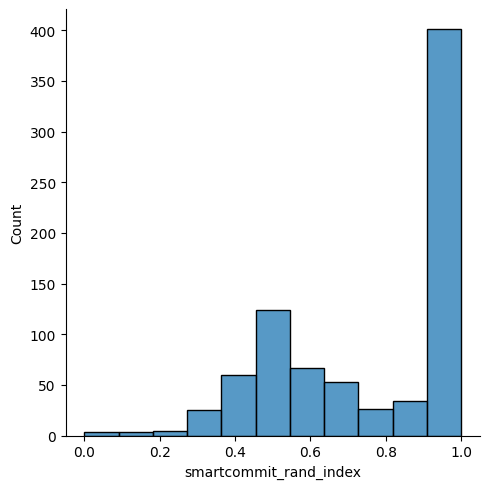

In [12]:
sns.displot(df, x="smartcommit_rand_index")

[Text(0.5, 1.0, 'Performance vs Lines')]

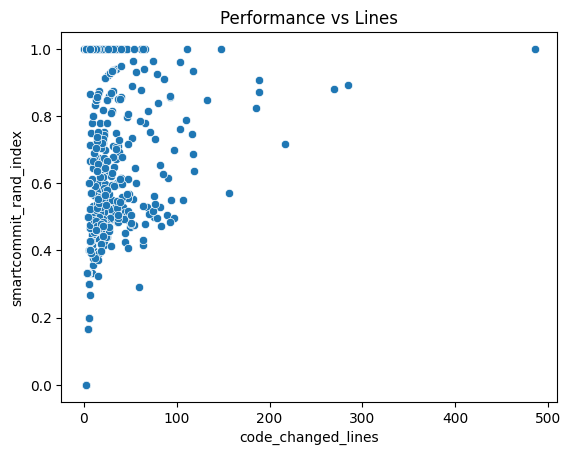

In [13]:
sns.scatterplot(df, x="code_changed_lines", y="smartcommit_rand_index").set(title="Performance vs Lines")

[Text(0.5, 1.0, 'Performance vs Lines')]

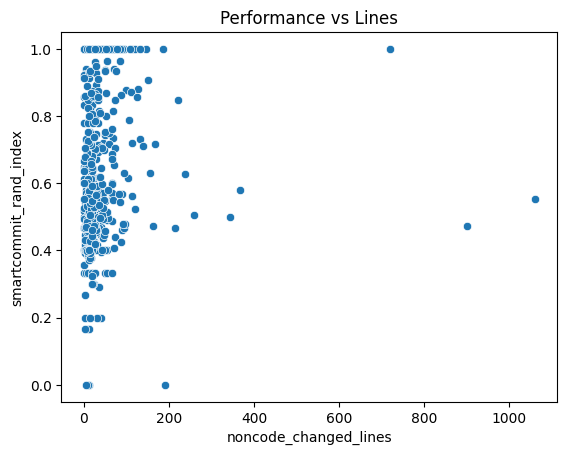

In [14]:
sns.scatterplot(df, x="noncode_changed_lines", y="smartcommit_rand_index").set(title="Performance vs Lines")

[Text(0.5, 1.0, 'Performance vs Files')]

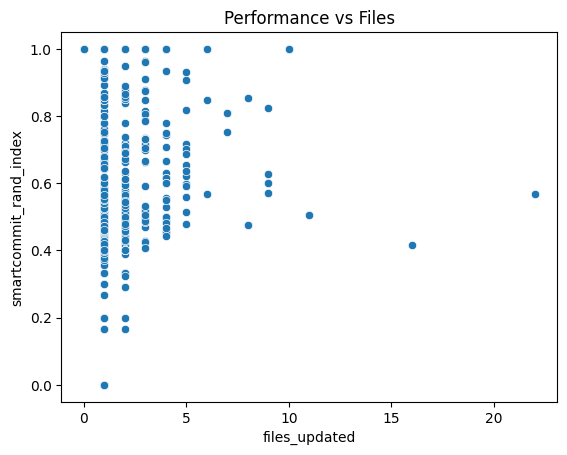

In [15]:
sns.scatterplot(df, x="files_updated", y="smartcommit_rand_index").set(title="Performance vs Files")

[Text(0.5, 1.0, 'Performance vs Tangled Lines')]

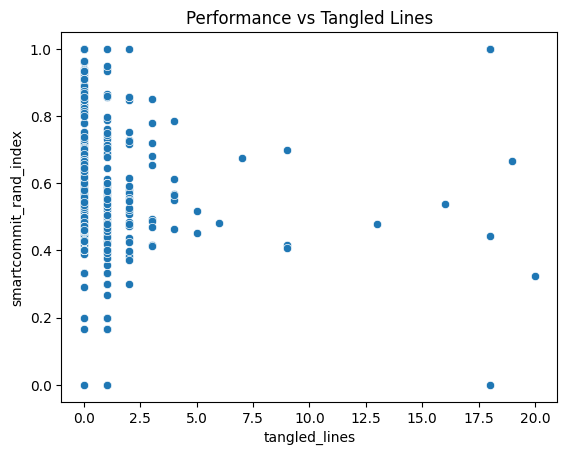

In [16]:
sns.scatterplot(df, x="tangled_lines", y="smartcommit_rand_index").set(title="Performance vs Tangled Lines")

[Text(0.5, 1.0, 'Performance vs Tangled Hunks')]

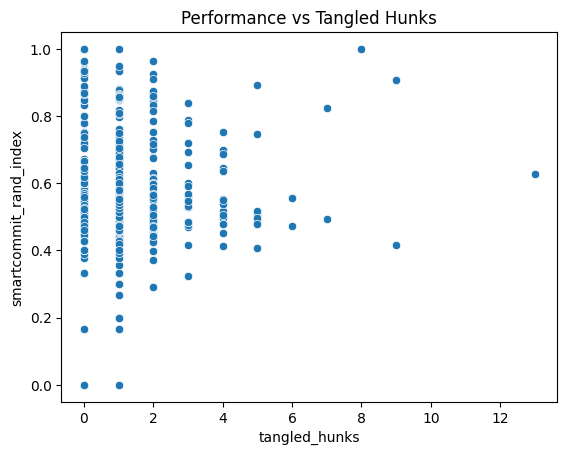

In [17]:
sns.scatterplot(df, x="tangled_hunks", y="smartcommit_rand_index").set(title="Performance vs Tangled Hunks")

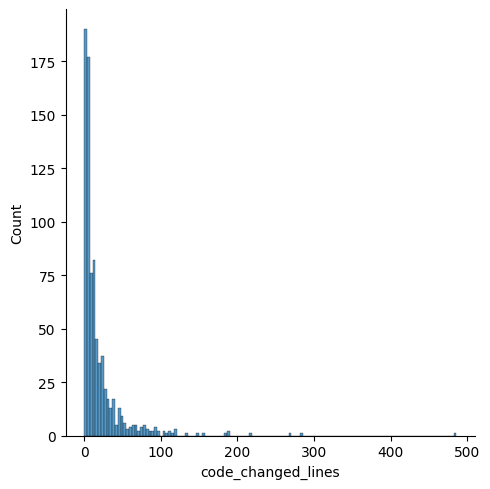

In [18]:
sns.displot(df, x="code_changed_lines")

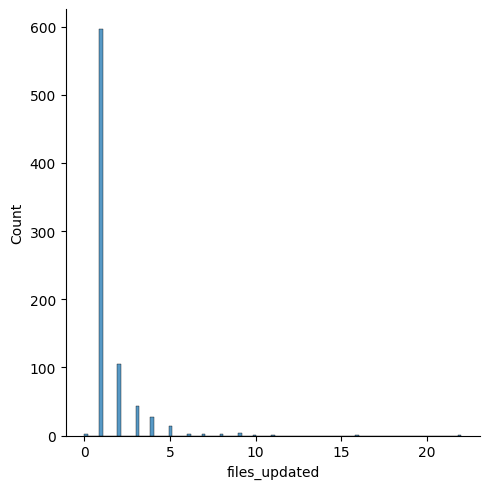

In [19]:
sns.displot(df, x="files_updated")

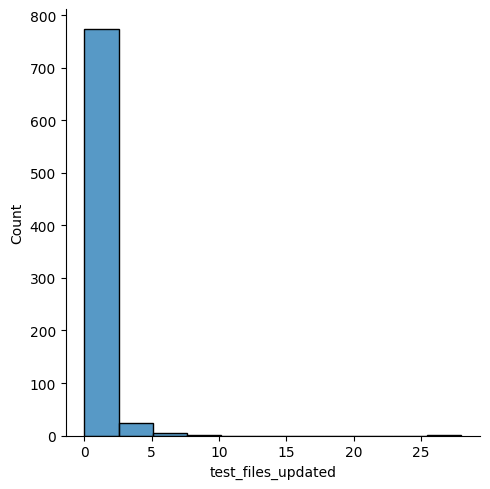

In [20]:
sns.displot(df, x="test_files_updated")

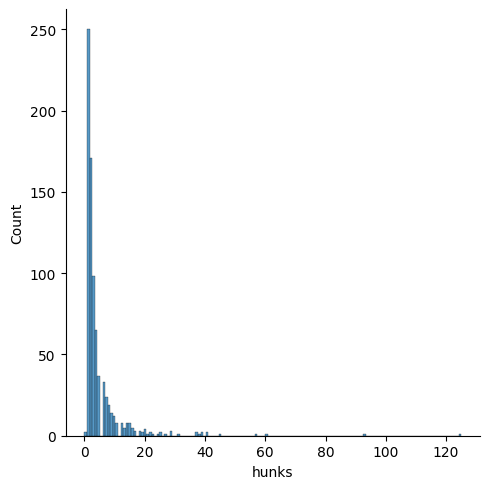

In [21]:
sns.displot(df, x="hunks")

<Axes: >

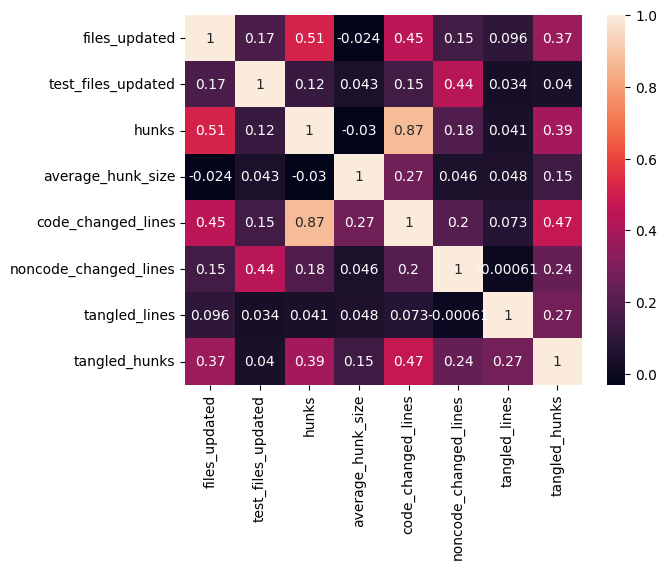

In [22]:
features = list(['files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'code_changed_lines', "noncode_changed_lines","tangled_lines","tangled_hunks"])
correlation_matrix = df[features].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

In [23]:
df_time = pd.read_csv("../out/time.csv", names=['project', 'bug_id', 'tool', 'time'])
df_time.head()

FileNotFoundError: [Errno 2] No such file or directory: '../out/time.csv'

In [ ]:
df_time.groupby('tool').mean()

In [ ]:
df.describe()

In [ ]:
df.groupby('project')['project'].count()

## Statistical Significance and Effect Size

In [12]:
df.to_csv('merge.csv', index=False)
# Please use the RQ2.R instead of the code cell below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

In [ ]:
# formula = 'smartcommit_rand_index ~ files_updated+test_files_updated+hunks+average_hunk_size+lines_updated'
# model = smf.mixedlm(formula = formula, data=df, groups=df['project'])
# result = model.fit()
# # pd.options.display.max_rows = 4000
#
# result.summary()

### Tisane test (WIP)

In [ ]:
import tisane as ts
import pandas as pd

## Load data
df = pd.read_csv("./exercise_simple.csv")

## Declare observed variables
# The researchers observe participants/cases (observational unit).
pid = ts.Unit("case", cardinality=245) # pid is an observational unit. There are 245 adults.

# Each pid (cause/adult) has an age measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable age.
# Note: By default, number_of_instances equals 1. The parameter value is explicitly set below for clarity.
age = pid.numeric("age", number_of_instances=1)  # participant age

# Each pid has an exercise measure, which is numeric .
# Verbose: Each instance of pid has one instance of a numeric variable exercise.
exercise = pid.numeric("exercise")  # years of vigorous physical exercise

# Each pid has an endurance measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable endurance.
endurance = pid.numeric("endurance") # number of minutes of sustained jogging on a treadmill

## Declare conceptual relationships between the observed variables
exercise.causes(endurance)
age.associates_with(endurance)

## Query relatioships to infer a statistical model and generate a script
# Author query by partially authoring a statistical model as a Design
design = ts.Design(dv=endurance, ivs=[age, exercise]).assign_data(df)
ts.infer_statistical_model_from_design(design=design)